## Module 2: Fitting the Linear Model

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [ ]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm


archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

### Step 1

*   Create a copy of the data and call it `df`
*   Select the `X` variable to be `MedInc` and the `y` be `MedianHouseValue`

Return `X.shape, y.shape` to verify.

In [ ]:
# CodeGrade step1
df = data.copy()
X = df[['MedInc']]
y = target
print(X.shape, y.shape)

(20640, 1) (20640,)


### Step 2

Using `statsmodels`


*   Add the constant term and call it `X_const`
*   fit the OLS model and call it `model`
*   extract the residuals and call them `residuals`
*   count the number of positive and negative residuals, calling them `positive_residuals` and `negative_residuals`, respectively

Return `positive_residuals, negative_residuals` to verify.

In [ ]:
# CodeGrade step2
X_const = sm.add_constant(df['MedInc'])

model = sm.OLS(y, X_const).fit()

residuals = model.resid

positive_residuals = np.sum(residuals > 0)
negative_residuals = np.sum(residuals < 0)

print(positive_residuals, negative_residuals)


8375 12265


### Code

Compute and return $r^2$, calling it `r_squared`.

### Code



In [31]:
# CodeGrade step3
r_squared = model.rsquared
print(r_squared)


0.47344749180719903


In [32]:
X_const.columns

Index(['const', 'MedInc'], dtype='object')

In [33]:
residuals.shape

(20640,)

Plot the residual plot.

Text(0.5, 1.0, 'Residual Plot')

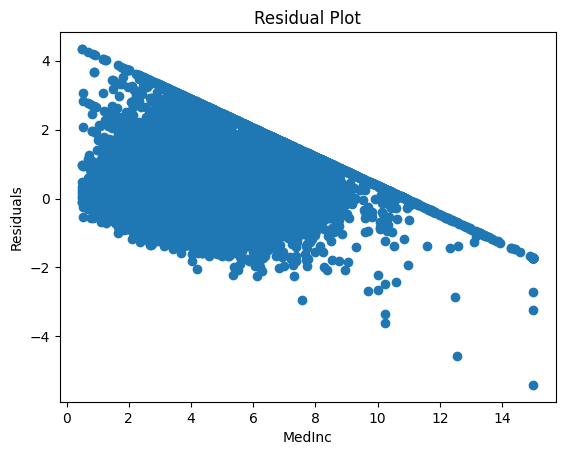

In [34]:
# Residual plot
plt.scatter(X_const['MedInc'], residuals)
plt.xlabel('MedInc')
plt.ylabel('Residuals')
plt.title('Residual Plot')

### Step 4

Compute Cook's distance, where the model's `get_influence` is called `influence` and the Cook's distance from this is called `cooks_d`.

Then identify the influential points, calling them `influential_points`. Verify this by returing `influential_points.shape`.

In [35]:
# CodeGrade step4
influence = model.get_influence()
cooks_d, _ = influence.cooks_distance
influential_points = np.where(cooks_d > 1)[0]
print(influential_points.shape)

(0,)


Now plot Cook's Distance.

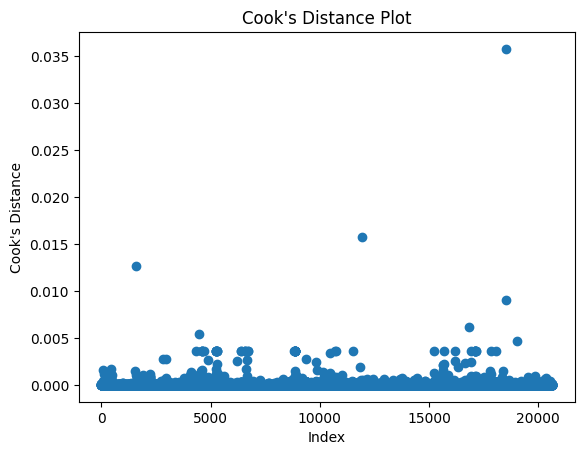

In [36]:
# Plot Cook's Distance
plt.scatter(np.arange(len(X_const)), cooks_d)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.show()

#  0 points in cook's distance plot over 1, meaning no single point is overly influencing the model